Nash Strategy - Avg Total Revenue: 165879.90
Random Strategy - Avg Total Revenue: 53590.42
Fixed Increment Strategy - Avg Total Revenue: 309107.86


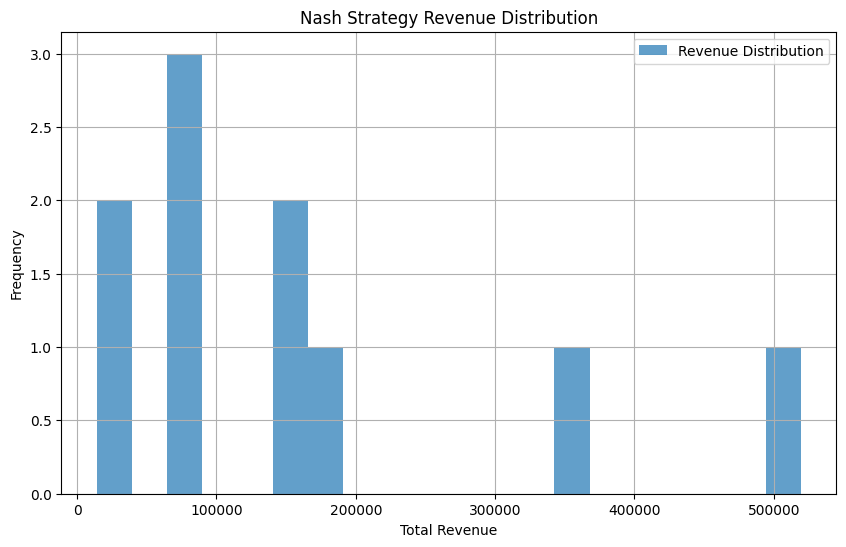

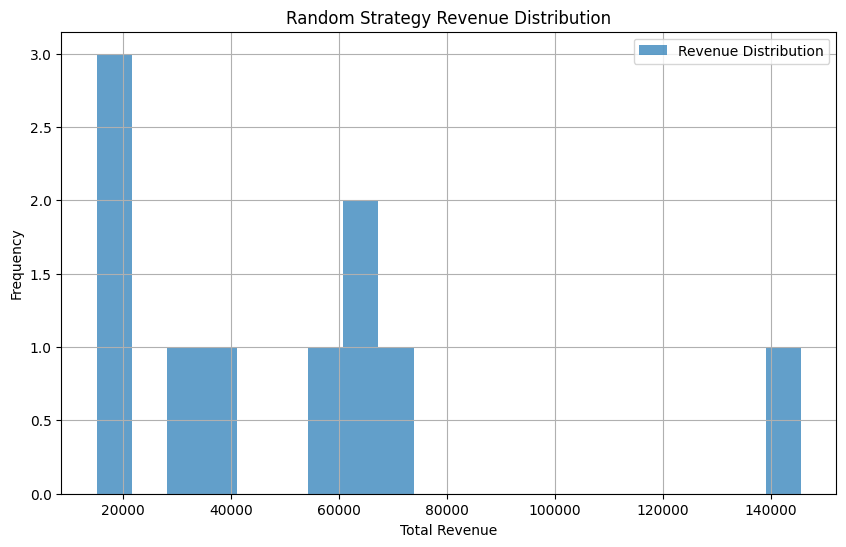

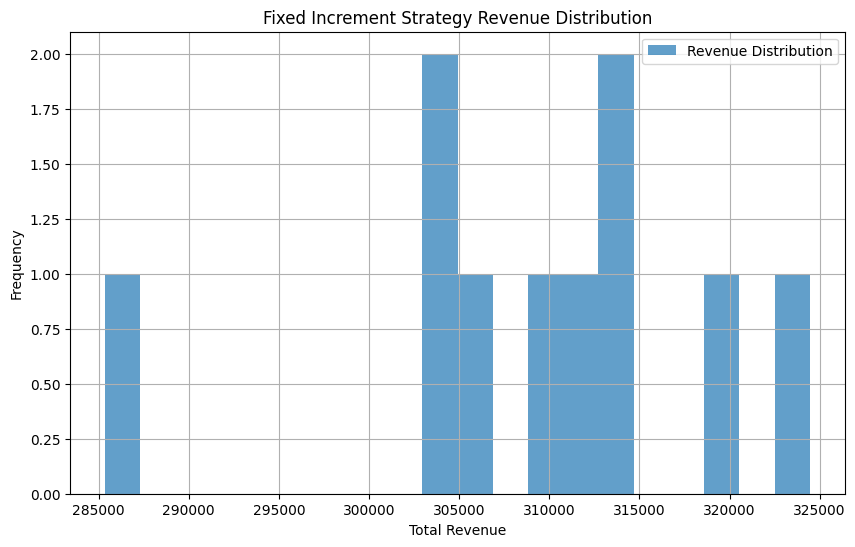

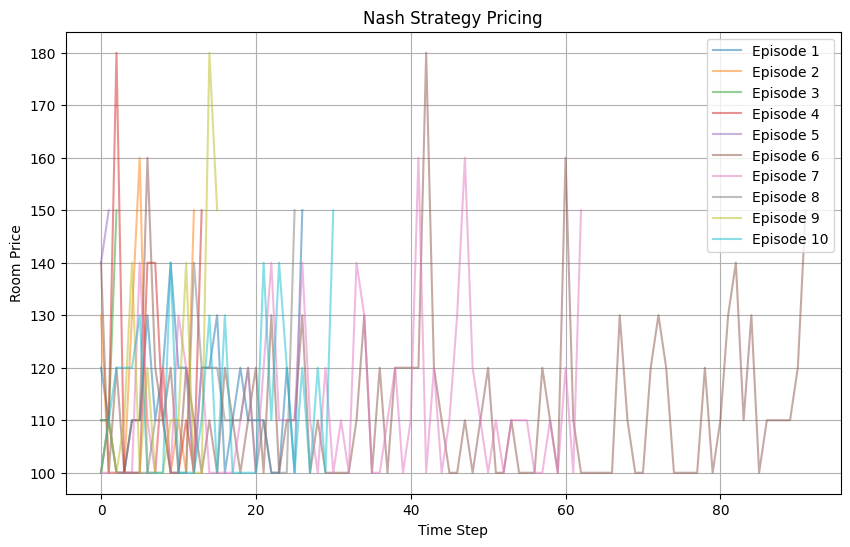

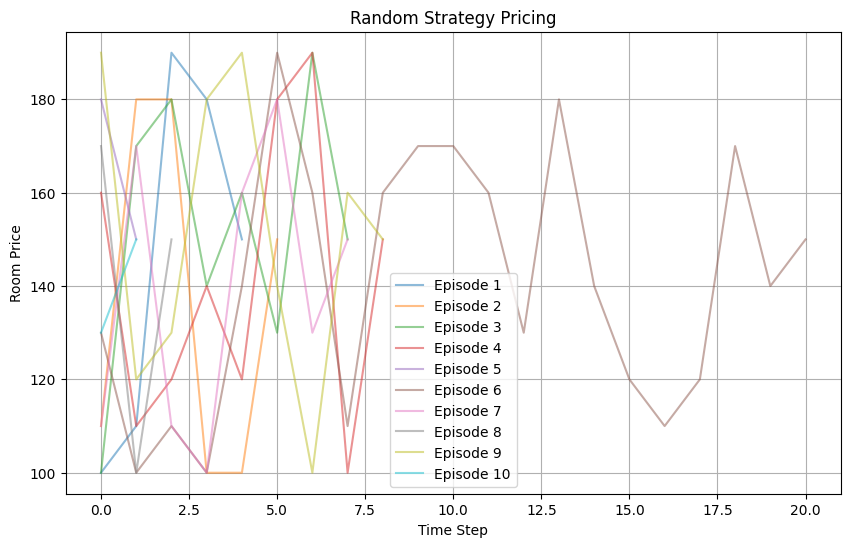

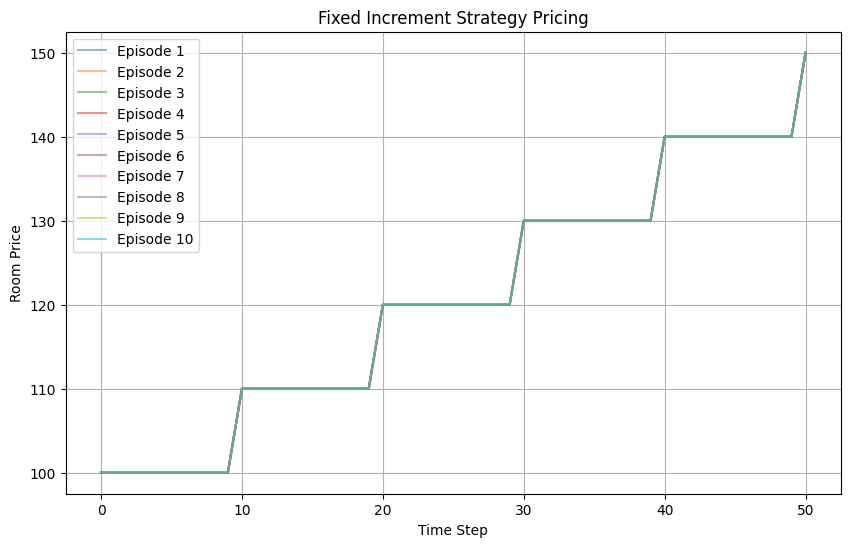

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Define the hotel pricing environment simulation
class HotelPricingEnvironment:
    def __init__(self, demand_mean=50, demand_std=10):
        self.time_steps = 100
        self.initial_price = 100
        self.price_increment = 10
        self.demand_mean = demand_mean
        self.demand_std = demand_std

    def step(self, action):
        # Calculate room price based on action (incremental pricing)
        room_price = self.initial_price + action * self.price_increment

        # Generate demand as a stochastic process (normal distribution)
        demand = np.random.normal(self.demand_mean, self.demand_std)

        # Calculate revenue (demand * room price)
        revenue = demand * room_price

        # Return next state (no state transition in this simple simulation)
        next_state = None

        # Return reward (revenue as profit for simplicity)
        reward = revenue

        # Determine if episode is done (end after fixed time steps)
        done = False
        if action == 5:  # End episode after a certain number of actions (for simulation)
            done = True

        return next_state, reward, done, room_price

# Nash Equilibrium for hotel pricing
def nash_equilibrium(prices, demands):
    # Define the payoff matrix
    payoff_matrix = np.zeros((len(prices), len(prices)))
    for i, price1 in enumerate(prices):
        for j, price2 in enumerate(prices):
            payoff_matrix[i, j] = demands[i] * price1 - demands[j] * price2

    # Set up the linear programming problem to find the Nash equilibrium
    num_strategies = len(prices)
    c = [-1] * num_strategies
    A_ub = np.transpose(payoff_matrix) - np.eye(num_strategies)
    b_ub = [0] * num_strategies
    A_eq = [[1] * num_strategies]
    b_eq = [1]
    bounds = [(0, 1) for _ in range(num_strategies)]

    res = linprog(c, A_ub, b_ub, A_eq, b_eq, bounds=bounds, method='highs')
    return res.x

# Simulate the agent interacting with the environment using different strategies
def simulate_agent(strategy, demand_mean=50, demand_std=10, episodes=10):
    env = HotelPricingEnvironment(demand_mean, demand_std)
    action_size = 10  # Number of pricing actions (e.g., price increments)
    total_rewards = []
    all_prices = []

    for episode in range(episodes):  # Simulate episodes
        episode_rewards = []
        episode_prices = []

        for time_step in range(env.time_steps):
            if strategy == 'nash':
                prices = np.array([env.initial_price + i * env.price_increment for i in range(action_size)])
                demands = np.random.normal(env.demand_mean, env.demand_std, size=action_size)
                strategy_distribution = nash_equilibrium(prices, demands)
                action = np.random.choice(action_size, p=strategy_distribution)
            elif strategy == 'fixed_increment':
                action = (time_step // 10) % action_size  # Change every 10 time steps
            else:  # Random strategy
                action = np.random.randint(action_size)

            # Interact with environment
            next_state, reward, done, price = env.step(action)

            # Collect episode rewards and prices
            episode_rewards.append(reward)
            episode_prices.append(price)

            if done:
                break

        total_rewards.append(np.sum(episode_rewards))
        all_prices.append(episode_prices)

    return total_rewards, all_prices

# Comparison of Strategies
def compare_strategies():
    nash_rewards, nash_prices = simulate_agent('nash', episodes=10)
    random_rewards, random_prices = simulate_agent('random', episodes=10)
    fixed_increment_rewards, fixed_increment_prices = simulate_agent('fixed_increment', episodes=10)

    return (nash_rewards, nash_prices), (random_rewards, random_prices), (fixed_increment_rewards, fixed_increment_prices)

# Plot Pricing Strategies
def plot_pricing_strategies(prices, title):
    plt.figure(figsize=(10, 6))
    for i, episode_prices in enumerate(prices):
        plt.plot(episode_prices, alpha=0.5, label=f'Episode {i+1}')
    plt.xlabel('Time Step')
    plt.ylabel('Room Price')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Main function to perform analyses
def main():
    # Comparison of Strategies
    (nash_rewards, nash_prices), (random_rewards, random_prices), (fixed_increment_rewards, fixed_increment_prices) = compare_strategies()
    print(f"Nash Strategy - Avg Total Revenue: {np.mean(nash_rewards):.2f}")
    print(f"Random Strategy - Avg Total Revenue: {np.mean(random_rewards):.2f}")
    print(f"Fixed Increment Strategy - Avg Total Revenue: {np.mean(fixed_increment_rewards):.2f}")

    # Revenue Distribution Visualization
    plot_revenue_distribution(nash_rewards, 'Nash Strategy Revenue Distribution')
    plot_revenue_distribution(random_rewards, 'Random Strategy Revenue Distribution')
    plot_revenue_distribution(fixed_increment_rewards, 'Fixed Increment Strategy Revenue Distribution')

    # Pricing Strategy Visualization
    plot_pricing_strategies(nash_prices, 'Nash Strategy Pricing')
    plot_pricing_strategies(random_prices, 'Random Strategy Pricing')
    plot_pricing_strategies(fixed_increment_prices, 'Fixed Increment Strategy Pricing')

if __name__ == "__main__":
    main()


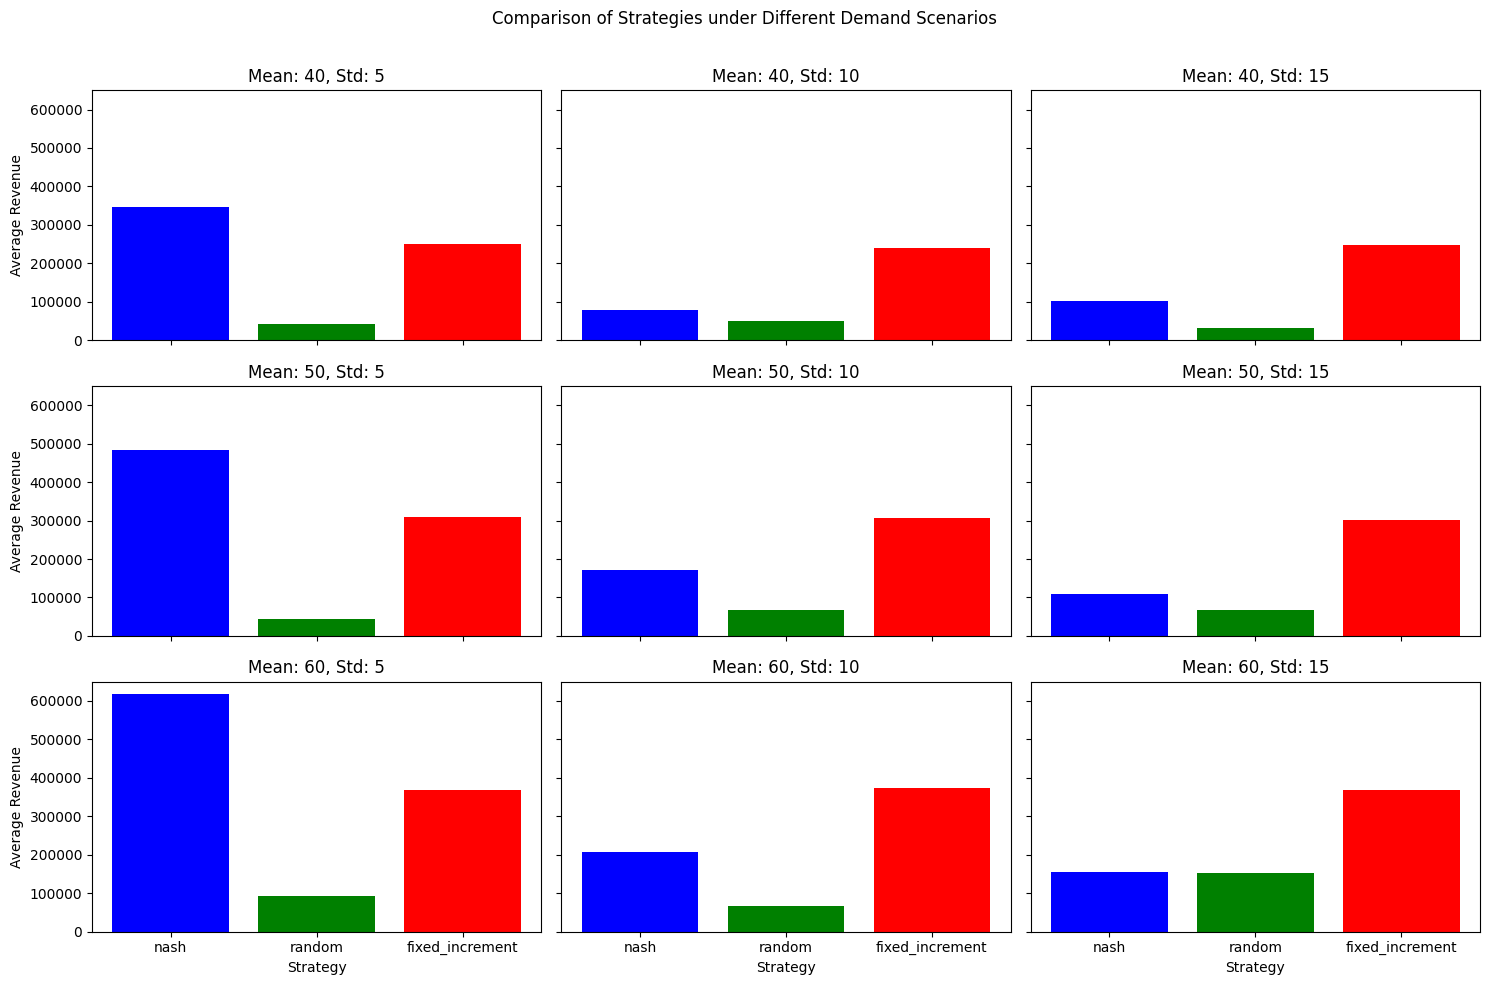

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Define the hotel pricing environment simulation
class HotelPricingEnvironment:
    def __init__(self, demand_mean=50, demand_std=10):
        self.time_steps = 100
        self.initial_price = 100
        self.price_increment = 10
        self.demand_mean = demand_mean
        self.demand_std = demand_std

    def step(self, action):
        # Calculate room price based on action (incremental pricing)
        room_price = self.initial_price + action * self.price_increment

        # Generate demand as a stochastic process (normal distribution)
        demand = np.random.normal(self.demand_mean, self.demand_std)

        # Calculate revenue (demand * room price)
        revenue = demand * room_price

        # Return next state (no state transition in this simple simulation)
        next_state = None

        # Return reward (revenue as profit for simplicity)
        reward = revenue

        # Determine if episode is done (end after fixed time steps)
        done = False
        if action == 5:  # End episode after a certain number of actions (for simulation)
            done = True

        return next_state, reward, done, room_price

# Nash Equilibrium for hotel pricing
def nash_equilibrium(prices, demands):
    # Define the payoff matrix
    payoff_matrix = np.zeros((len(prices), len(prices)))
    for i, price1 in enumerate(prices):
        for j, price2 in enumerate(prices):
            payoff_matrix[i, j] = demands[i] * price1 - demands[j] * price2

    # Set up the linear programming problem to find the Nash equilibrium
    num_strategies = len(prices)
    c = [-1] * num_strategies
    A_ub = np.transpose(payoff_matrix) - np.eye(num_strategies)
    b_ub = [0] * num_strategies
    A_eq = [[1] * num_strategies]
    b_eq = [1]
    bounds = [(0, 1) for _ in range(num_strategies)]

    res = linprog(c, A_ub, b_ub, A_eq, b_eq, bounds=bounds, method='highs')
    return res.x

# Simulate the agent interacting with the environment using different strategies
def simulate_agent(strategy, demand_mean=50, demand_std=10, episodes=10):
    env = HotelPricingEnvironment(demand_mean, demand_std)
    action_size = 10  # Number of pricing actions (e.g., price increments)
    total_rewards = []
    all_prices = []

    for episode in range(episodes):  # Simulate episodes
        episode_rewards = []
        episode_prices = []

        for time_step in range(env.time_steps):
            if strategy == 'nash':
                prices = np.array([env.initial_price + i * env.price_increment for i in range(action_size)])
                demands = np.random.normal(env.demand_mean, env.demand_std, size=action_size)
                strategy_distribution = nash_equilibrium(prices, demands)
                action = np.random.choice(action_size, p=strategy_distribution)
            elif strategy == 'fixed_increment':
                action = (time_step // 10) % action_size  # Change every 10 time steps
            else:  # Random strategy
                action = np.random.randint(action_size)

            # Interact with environment
            next_state, reward, done, price = env.step(action)

            # Collect episode rewards and prices
            episode_rewards.append(reward)
            episode_prices.append(price)

            if done:
                break

        total_rewards.append(np.sum(episode_rewards))
        all_prices.append(episode_prices)

    return total_rewards, all_prices

# Sensitivity Analysis
def sensitivity_analysis():
    means = [40, 50, 60]
    stds = [5, 10, 15]
    results = {}

    for mean in means:
        for std in stds:
            rewards = simulate_agent('nash', demand_mean=mean, demand_std=std, episodes=10)
            results[(mean, std)] = rewards

    return results

# Comparison of Strategies under Different Demand Scenarios
def compare_demand_scenarios():
    means = [40, 50, 60]
    stds = [5, 10, 15]
    results = {}

    for mean in means:
        for std in stds:
            nash_rewards, _ = simulate_agent('nash', demand_mean=mean, demand_std=std, episodes=10)
            random_rewards, _ = simulate_agent('random', demand_mean=mean, demand_std=std, episodes=10)
            fixed_increment_rewards, _ = simulate_agent('fixed_increment', demand_mean=mean, demand_std=std, episodes=10)
            results[(mean, std)] = {
                'nash': np.mean(nash_rewards),
                'random': np.mean(random_rewards),
                'fixed_increment': np.mean(fixed_increment_rewards)
            }

    return results

# Plot Comparison of Demand Scenarios
def plot_demand_scenario_comparison(results):
    means = sorted(set([key[0] for key in results.keys()]))
    stds = sorted(set([key[1] for key in results.keys()]))

    fig, axes = plt.subplots(len(means), len(stds), figsize=(15, 10), sharex=True, sharey=True)
    fig.suptitle('Comparison of Strategies under Different Demand Scenarios')

    for i, mean in enumerate(means):
        for j, std in enumerate(stds):
            ax = axes[i, j]
            key = (mean, std)
            data = results[key]
            strategies = list(data.keys())
            revenues = list(data.values())
            ax.bar(strategies, revenues, color=['blue', 'green', 'red'])
            ax.set_title(f'Mean: {mean}, Std: {std}')
            if j == 0:
                ax.set_ylabel('Average Revenue')
            if i == len(means) - 1:
                ax.set_xlabel('Strategy')

    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

# Main function to perform analyses
def main():
    # Comparison of Strategies under Different Demand Scenarios
    demand_scenario_results = compare_demand_scenarios()

    # Plot the results
    plot_demand_scenario_comparison(demand_scenario_results)

if __name__ == "__main__":
    main()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Define the hotel pricing environment simulation
class HotelPricingEnvironment:
    def __init__(self, demand_mean=50, demand_std=10):
        self.time_steps = 100
        self.initial_price = 100
        self.price_increment = 10
        self.demand_mean = demand_mean
        self.demand_std = demand_std

    def step(self, action):
        room_price = self.initial_price + action * self.price_increment
        demand = np.random.normal(self.demand_mean, self.demand_std)
        revenue = demand * room_price
        next_state = None
        reward = revenue
        done = False
        if action == 5:
            done = True
        return next_state, reward, done, room_price

# Function to calculate Nash Equilibrium
def nash_equilibrium(prices, demands):
    payoff_matrix = np.zeros((len(prices), len(prices)))
    for i, price1 in enumerate(prices):
        for j, price2 in enumerate(prices):
            payoff_matrix[i, j] = demands[i] * price1 - demands[j] * price2
    num_strategies = len(prices)
    c = [-1] * num_strategies
    A_ub = np.transpose(payoff_matrix) - np.eye(num_strategies)
    b_ub = [0] * num_strategies
    A_eq = [[1] * num_strategies]
    b_eq = [1]
    bounds = [(0, 1) for _ in range(num_strategies)]
    res = linprog(c, A_ub, b_ub, A_eq, b_eq, bounds=bounds, method='highs')
    return res.x

# Simulate the agent interacting with the environment using different strategies
def simulate_agent(strategy, demand_mean=50, demand_std=10, episodes=10):
    env = HotelPricingEnvironment(demand_mean, demand_std)
    action_size = 10
    total_rewards = []

    for episode in range(episodes):
        episode_rewards = []
        for time_step in range(env.time_steps):
            if strategy == 'nash':
                prices = np.array([env.initial_price + i * env.price_increment for i in range(action_size)])
                demands = np.random.normal(env.demand_mean, env.demand_std, size=action_size)
                strategy_distribution = nash_equilibrium(prices, demands)
                action = np.random.choice(action_size, p=strategy_distribution)
            elif strategy == 'fixed_increment':
                action = (time_step // 10) % action_size
            else:
                action = np.random.randint(action_size)
            _, reward, _, _ = env.step(action)
            episode_rewards.append(reward)
        total_rewards.append(np.sum(episode_rewards))

    mean_revenue = np.mean(total_rewards)
    revenue_volatility = np.std(total_rewards)
    max_revenue = np.max(total_rewards)

    return mean_revenue, revenue_volatility, max_revenue

# Main function to run the non-seasonal simulation and gather metrics
def main_non_seasonal():
    strategies = ['nash', 'random', 'fixed_increment']
    results = {}
    for strategy in strategies:
        mean_rev, rev_volatility, max_rev = simulate_agent(strategy)
        results[strategy] = {
            "Mean Revenue": mean_rev,
            "Revenue Volatility": rev_volatility,
            "Maximum Achievable Revenue": max_rev
        }
    print(results)

if __name__ == "__main__":
    main_non_seasonal()


{'nash': {'Mean Revenue': 570013.6292067261, 'Revenue Volatility': 10425.566433916798, 'Maximum Achievable Revenue': 593356.3304464635}, 'random': {'Mean Revenue': 729102.4460222579, 'Revenue Volatility': 20062.246749232287, 'Maximum Achievable Revenue': 753619.1658603569}, 'fixed_increment': {'Mean Revenue': 718128.1905491271, 'Revenue Volatility': 10083.113695016786, 'Maximum Achievable Revenue': 730557.3315597698}}


Nash Strategy - Avg Total Revenue: 565080.02
Random Strategy - Avg Total Revenue: 725203.66
Fixed Increment Strategy - Avg Total Revenue: 705046.44


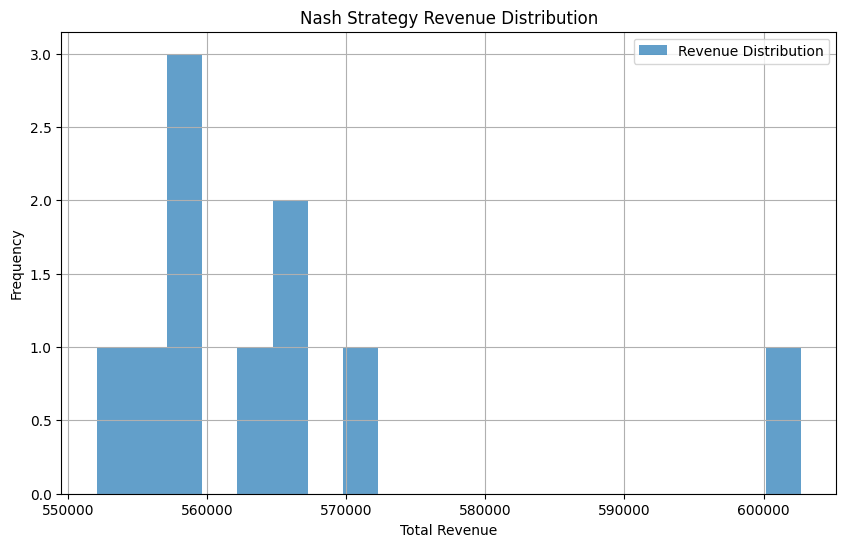

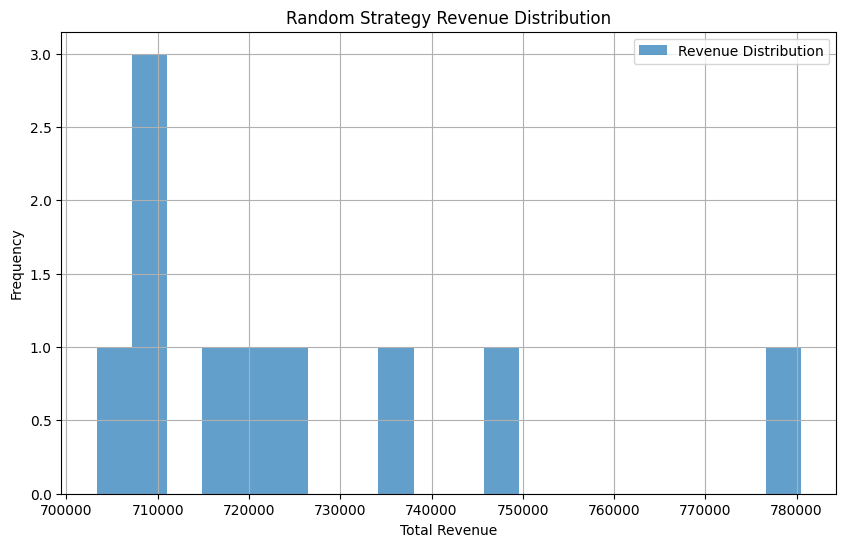

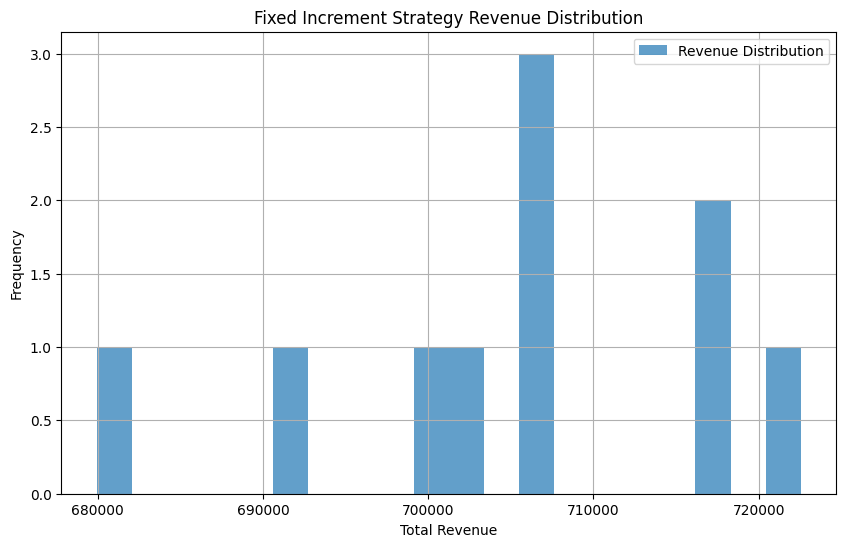

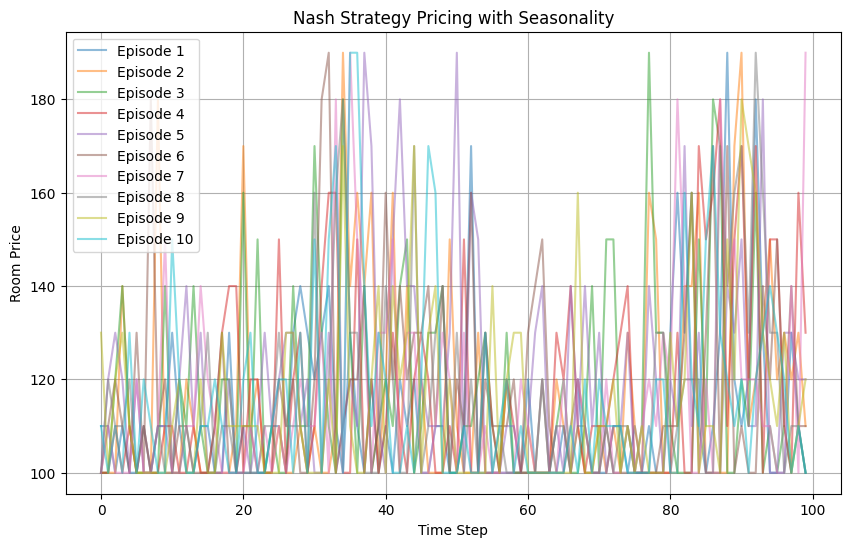

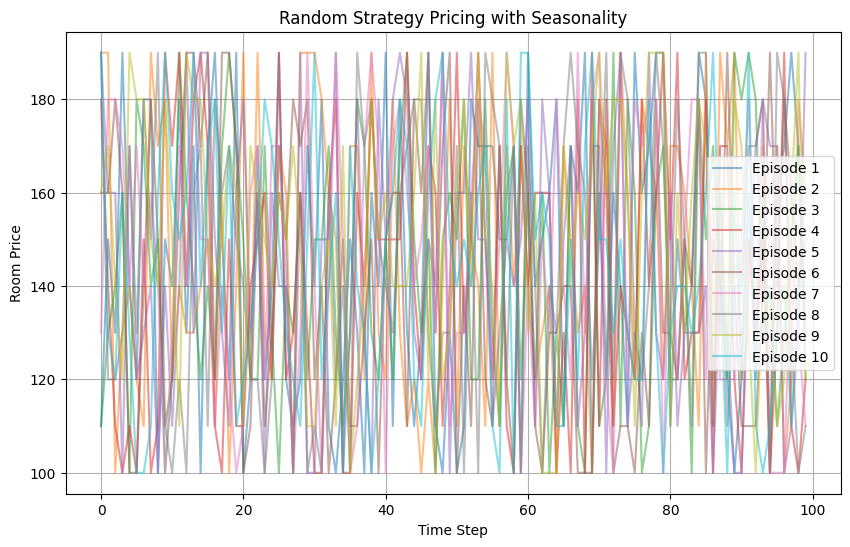

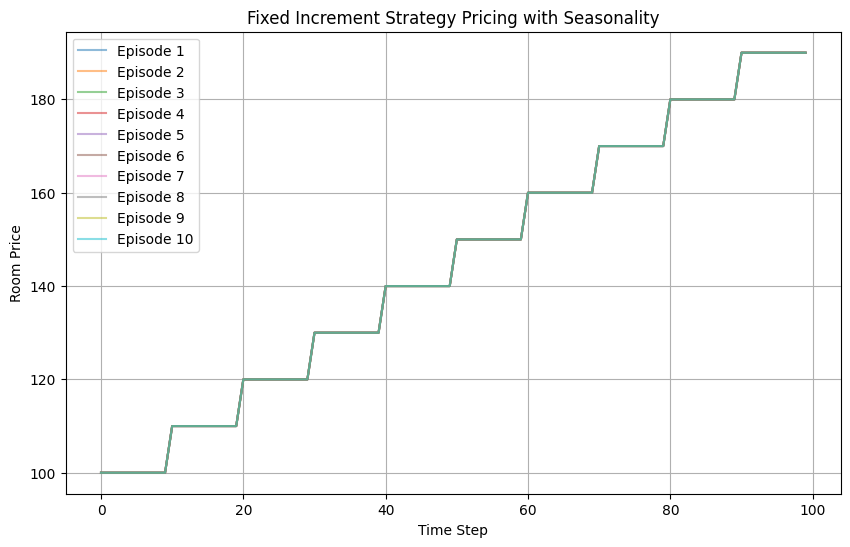

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Define the hotel pricing environment simulation with seasonality
class HotelPricingEnvironment:
    def __init__(self, base_demand_mean=50, demand_std=10, seasonality_amplitude=20, seasonality_period=50):
        self.time_steps = 100
        self.initial_price = 100
        self.price_increment = 10
        self.base_demand_mean = base_demand_mean
        self.demand_std = demand_std
        self.seasonality_amplitude = seasonality_amplitude
        self.seasonality_period = seasonality_period

    def step(self, action, time_step):
        # Calculate room price based on action (incremental pricing)
        room_price = self.initial_price + action * self.price_increment

        # Calculate seasonal demand mean
        seasonal_demand_mean = self.base_demand_mean + self.seasonality_amplitude * np.sin(2 * np.pi * time_step / self.seasonality_period)

        # Generate demand as a stochastic process (normal distribution)
        demand = np.random.normal(seasonal_demand_mean, self.demand_std)

        # Calculate revenue (demand * room price)
        revenue = demand * room_price

        # Return next state (no state transition in this simple simulation)
        next_state = None

        # Return reward (revenue as profit for simplicity)
        reward = revenue

        # Determine if episode is done (end after fixed time steps)
        done = time_step >= self.time_steps - 1

        return next_state, reward, done, room_price

# Nash Equilibrium for hotel pricing
def nash_equilibrium(prices, demands):
    # Define the payoff matrix
    payoff_matrix = np.zeros((len(prices), len(prices)))
    for i, price1 in enumerate(prices):
        for j, price2 in enumerate(prices):
            payoff_matrix[i, j] = demands[i] * price1 - demands[j] * price2

    # Set up the linear programming problem to find the Nash equilibrium
    num_strategies = len(prices)
    c = [-1] * num_strategies
    A_ub = np.transpose(payoff_matrix) - np.eye(num_strategies)
    b_ub = [0] * num_strategies
    A_eq = [[1] * num_strategies]
    b_eq = [1]
    bounds = [(0, 1) for _ in range(num_strategies)]

    res = linprog(c, A_ub, b_ub, A_eq, b_eq, bounds=bounds, method='highs')
    return res.x

# Simulate the agent interacting with the environment using different strategies
def simulate_agent(strategy, base_demand_mean=50, demand_std=10, seasonality_amplitude=20, seasonality_period=50, episodes=10):
    env = HotelPricingEnvironment(base_demand_mean, demand_std, seasonality_amplitude, seasonality_period)
    action_size = 10  # Number of pricing actions (e.g., price increments)
    total_rewards = []
    all_prices = []

    for episode in range(episodes):  # Simulate episodes
        episode_rewards = []
        episode_prices = []

        for time_step in range(env.time_steps):
            if strategy == 'nash':
                prices = np.array([env.initial_price + i * env.price_increment for i in range(action_size)])
                seasonal_demand_mean = env.base_demand_mean + env.seasonality_amplitude * np.sin(2 * np.pi * time_step / env.seasonality_period)
                demands = np.random.normal(seasonal_demand_mean, env.demand_std, size=action_size)
                strategy_distribution = nash_equilibrium(prices, demands)
                action = np.random.choice(action_size, p=strategy_distribution)
            elif strategy == 'fixed_increment':
                action = (time_step // 10) % action_size  # Change every 10 time steps
            else:  # Random strategy
                action = np.random.randint(action_size)

            # Interact with environment
            next_state, reward, done, price = env.step(action, time_step)

            # Collect episode rewards and prices
            episode_rewards.append(reward)
            episode_prices.append(price)

            if done:
                break

        total_rewards.append(np.sum(episode_rewards))
        all_prices.append(episode_prices)

    return total_rewards, all_prices

# Comparison of Strategies with Seasonality
def compare_strategies_with_seasonality():
    nash_rewards, nash_prices = simulate_agent('nash', episodes=10)
    random_rewards, random_prices = simulate_agent('random', episodes=10)
    fixed_increment_rewards, fixed_increment_prices = simulate_agent('fixed_increment', episodes=10)

    return (nash_rewards, nash_prices), (random_rewards, random_prices), (fixed_increment_rewards, fixed_increment_prices)

# Plot Pricing Strategies with Seasonality
def plot_pricing_strategies_with_seasonality(prices, title):
    plt.figure(figsize=(10, 6))
    for i, episode_prices in enumerate(prices):
        plt.plot(episode_prices, alpha=0.5, label=f'Episode {i+1}')
    plt.xlabel('Time Step')
    plt.ylabel('Room Price')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Main function to perform analyses with seasonality
def main():
    # Comparison of Strategies with Seasonality
    (nash_rewards, nash_prices), (random_rewards, random_prices), (fixed_increment_rewards, fixed_increment_prices) = compare_strategies_with_seasonality()
    print(f"Nash Strategy - Avg Total Revenue: {np.mean(nash_rewards):.2f}")
    print(f"Random Strategy - Avg Total Revenue: {np.mean(random_rewards):.2f}")
    print(f"Fixed Increment Strategy - Avg Total Revenue: {np.mean(fixed_increment_rewards):.2f}")

    # Revenue Distribution Visualization
    plot_revenue_distribution(nash_rewards, 'Nash Strategy Revenue Distribution')
    plot_revenue_distribution(random_rewards, 'Random Strategy Revenue Distribution')
    plot_revenue_distribution(fixed_increment_rewards, 'Fixed Increment Strategy Revenue Distribution')

    # Pricing Strategy Visualization
    plot_pricing_strategies_with_seasonality(nash_prices, 'Nash Strategy Pricing with Seasonality')
    plot_pricing_strategies_with_seasonality(random_prices, 'Random Strategy Pricing with Seasonality')
    plot_pricing_strategies_with_seasonality(fixed_increment_prices, 'Fixed Increment Strategy Pricing with Seasonality')

if __name__ == "__main__":
    main()


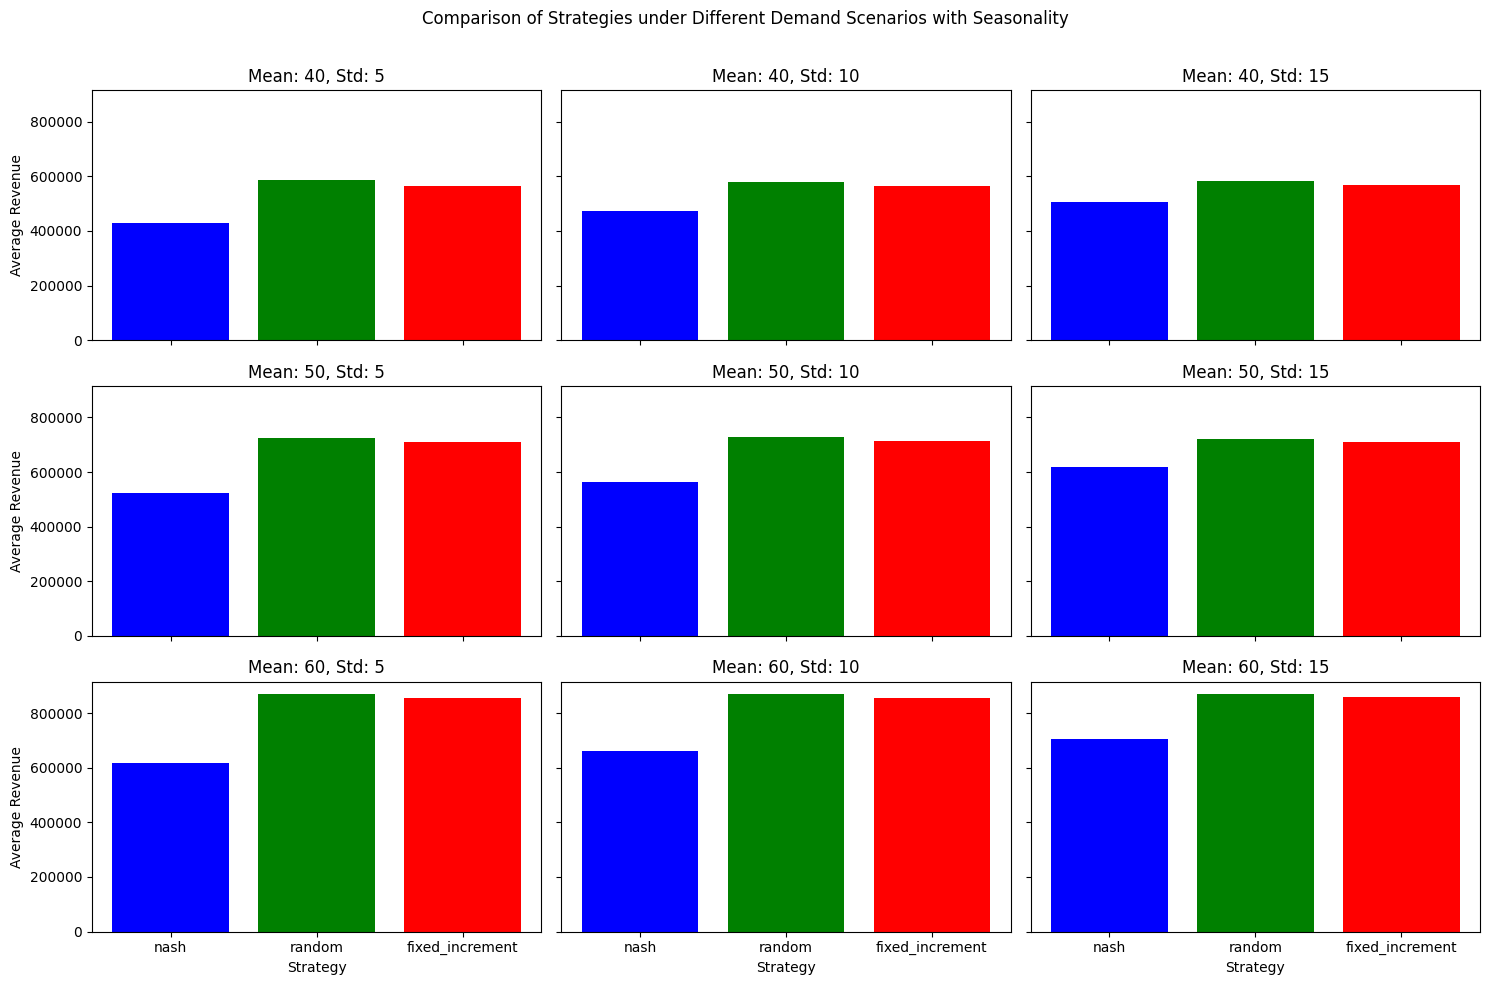

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Define the hotel pricing environment simulation with seasonality
class HotelPricingEnvironment:
    def __init__(self, base_demand_mean=50, demand_std=10, seasonality_amplitude=20, seasonality_period=50):
        self.time_steps = 100
        self.initial_price = 100
        self.price_increment = 10
        self.base_demand_mean = base_demand_mean
        self.demand_std = demand_std
        self.seasonality_amplitude = seasonality_amplitude
        self.seasonality_period = seasonality_period

    def step(self, action, time_step):
        # Calculate room price based on action (incremental pricing)
        room_price = self.initial_price + action * self.price_increment

        # Calculate seasonal demand mean
        seasonal_demand_mean = self.base_demand_mean + self.seasonality_amplitude * np.sin(2 * np.pi * time_step / self.seasonality_period)

        # Generate demand as a stochastic process (normal distribution)
        demand = np.random.normal(seasonal_demand_mean, self.demand_std)

        # Calculate revenue (demand * room price)
        revenue = demand * room_price

        # Return next state (no state transition in this simple simulation)
        next_state = None

        # Return reward (revenue as profit for simplicity)
        reward = revenue

        # Determine if episode is done (end after fixed time steps)
        done = time_step >= self.time_steps - 1

        return next_state, reward, done, room_price

# Nash Equilibrium for hotel pricing
def nash_equilibrium(prices, demands):
    # Define the payoff matrix
    payoff_matrix = np.zeros((len(prices), len(prices)))
    for i, price1 in enumerate(prices):
        for j, price2 in enumerate(prices):
            payoff_matrix[i, j] = demands[i] * price1 - demands[j] * price2

    # Set up the linear programming problem to find the Nash equilibrium
    num_strategies = len(prices)
    c = [-1] * num_strategies
    A_ub = np.transpose(payoff_matrix) - np.eye(num_strategies)
    b_ub = [0] * num_strategies
    A_eq = [[1] * num_strategies]
    b_eq = [1]
    bounds = [(0, 1) for _ in range(num_strategies)]

    res = linprog(c, A_ub, b_ub, A_eq, b_eq, bounds=bounds, method='highs')
    return res.x

# Simulate the agent interacting with the environment using different strategies
def simulate_agent(strategy, base_demand_mean=50, demand_std=10, seasonality_amplitude=20, seasonality_period=50, episodes=10):
    env = HotelPricingEnvironment(base_demand_mean, demand_std, seasonality_amplitude, seasonality_period)
    action_size = 10  # Number of pricing actions (e.g., price increments)
    total_rewards = []
    all_prices = []

    for episode in range(episodes):  # Simulate episodes
        episode_rewards = []
        episode_prices = []

        for time_step in range(env.time_steps):
            if strategy == 'nash':
                prices = np.array([env.initial_price + i * env.price_increment for i in range(action_size)])
                seasonal_demand_mean = env.base_demand_mean + env.seasonality_amplitude * np.sin(2 * np.pi * time_step / env.seasonality_period)
                demands = np.random.normal(seasonal_demand_mean, env.demand_std, size=action_size)
                strategy_distribution = nash_equilibrium(prices, demands)
                action = np.random.choice(action_size, p=strategy_distribution)
            elif strategy == 'fixed_increment':
                action = (time_step // 10) % action_size  # Change every 10 time steps
            else:  # Random strategy
                action = np.random.randint(action_size)

            # Interact with environment
            next_state, reward, done, price = env.step(action, time_step)

            # Collect episode rewards and prices
            episode_rewards.append(reward)
            episode_prices.append(price)

            if done:
                break

        total_rewards.append(np.sum(episode_rewards))
        all_prices.append(episode_prices)

    return total_rewards, all_prices

# Comparison of Strategies under Different Demand Scenarios with Seasonality
def compare_demand_scenarios_with_seasonality():
    means = [40, 50, 60]
    stds = [5, 10, 15]
    results = {}

    for mean in means:
        for std in stds:
            nash_rewards, _ = simulate_agent('nash', base_demand_mean=mean, demand_std=std, episodes=10)
            random_rewards, _ = simulate_agent('random', base_demand_mean=mean, demand_std=std, episodes=10)
            fixed_increment_rewards, _ = simulate_agent('fixed_increment', base_demand_mean=mean, demand_std=std, episodes=10)
            results[(mean, std)] = {
                'nash': np.mean(nash_rewards),
                'random': np.mean(random_rewards),
                'fixed_increment': np.mean(fixed_increment_rewards)
            }

    return results

# Plot Comparison of Demand Scenarios with Seasonality
def plot_demand_scenario_comparison_with_seasonality(results):
    means = sorted(set([key[0] for key in results.keys()]))
    stds = sorted(set([key[1] for key in results.keys()]))

    fig, axes = plt.subplots(len(means), len(stds), figsize=(15, 10), sharex=True, sharey=True)
    fig.suptitle('Comparison of Strategies under Different Demand Scenarios with Seasonality')

    for i, mean in enumerate(means):
        for j, std in enumerate(stds):
            ax = axes[i, j]
            key = (mean, std)
            data = results[key]
            strategies = list(data.keys())
            revenues = list(data.values())
            ax.bar(strategies, revenues, color=['blue', 'green', 'red'])
            ax.set_title(f'Mean: {mean}, Std: {std}')
            if j == 0:
                ax.set_ylabel('Average Revenue')
            if i == len(means) - 1:
                ax.set_xlabel('Strategy')

    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

# Main function to perform analyses
def main():
    # Comparison of Strategies under Different Demand Scenarios with Seasonality
    demand_scenario_results = compare_demand_scenarios_with_seasonality()

    # Plot the results
    plot_demand_scenario_comparison_with_seasonality(demand_scenario_results)

if __name__ == "__main__":
    main()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Define the hotel pricing environment simulation with seasonality
class HotelPricingEnvironment:
    def __init__(self, base_demand_mean=50, demand_std=10, seasonality_amplitude=20, seasonality_period=50):
        self.time_steps = 100
        self.initial_price = 100
        self.price_increment = 10
        self.base_demand_mean = base_demand_mean
        self.demand_std = demand_std
        self.seasonality_amplitude = seasonality_amplitude
        self.seasonality_period = seasonality_period

    def step(self, action, time_step):
        room_price = self.initial_price + action * self.price_increment
        seasonal_demand_mean = self.base_demand_mean + self.seasonality_amplitude * np.sin(2 * np.pi * time_step / self.seasonality_period)
        demand = np.random.normal(seasonal_demand_mean, self.demand_std)
        revenue = demand * room_price
        next_state = None
        reward = revenue
        done = time_step >= self.time_steps - 1
        return next_state, reward, done, room_price

# Function to calculate Nash Equilibrium
def nash_equilibrium(prices, demands):
    payoff_matrix = np.zeros((len(prices), len(prices)))
    for i, price1 in enumerate(prices):
        for j, price2 in enumerate(prices):
            payoff_matrix[i, j] = demands[i] * price1 - demands[j] * price2
    num_strategies = len(prices)
    c = [-1] * num_strategies
    A_ub = np.transpose(payoff_matrix) - np.eye(num_strategies)
    b_ub = [0] * num_strategies
    A_eq = [[1] * num_strategies]
    b_eq = [1]
    bounds = [(0, 1) for _ in range(num_strategies)]
    res = linprog(c, A_ub, b_ub, A_eq, b_eq, bounds=bounds, method='highs')
    return res.x

# Simulate the agent interacting with the environment using different strategies
def simulate_agent_seasonal(strategy, base_demand_mean=50, demand_std=10, seasonality_amplitude=20, seasonality_period=50, episodes=10):
    env = HotelPricingEnvironment(base_demand_mean, demand_std, seasonality_amplitude, seasonality_period)
    action_size = 10
    total_rewards = []

    for episode in range(episodes):
        episode_rewards = []
        for time_step in range(env.time_steps):
            if strategy == 'nash':
                prices = np.array([env.initial_price + i * env.price_increment for i in range(action_size)])
                seasonal_demand_mean = env.base_demand_mean + env.seasonality_amplitude * np.sin(2 * np.pi * time_step / env.seasonality_period)
                demands = np.random.normal(seasonal_demand_mean, env.demand_std, size=action_size)
                strategy_distribution = nash_equilibrium(prices, demands)
                action = np.random.choice(action_size, p=strategy_distribution)
            elif strategy == 'fixed_increment':
                action = (time_step // 10) % action_size
            else:
                action = np.random.randint(action_size)
            _, reward, _, _ = env.step(action, time_step)
            episode_rewards.append(reward)
        total_rewards.append(np.sum(episode_rewards))

    mean_revenue = np.mean(total_rewards)
    revenue_volatility = np.std(total_rewards)
    max_revenue = np.max(total_rewards)

    return mean_revenue, revenue_volatility, max_revenue

# Main function to run the seasonal simulation and gather metrics
def main_seasonal():
    strategies = ['nash', 'random', 'fixed_increment']
    results = {}
    for strategy in strategies:
        mean_rev, rev_volatility, max_rev = simulate_agent_seasonal(strategy)
        results[strategy] = {
            "Mean Revenue": mean_rev,
            "Revenue Volatility": rev_volatility,
            "Maximum Achievable Revenue": max_rev
        }
    print(results)

if __name__ == "__main__":
    main_seasonal()


{'nash': {'Mean Revenue': 564039.3371172401, 'Revenue Volatility': 12581.598292080595, 'Maximum Achievable Revenue': 582475.6175233495}, 'random': {'Mean Revenue': 725831.7620927267, 'Revenue Volatility': 16590.99165209379, 'Maximum Achievable Revenue': 753593.8655808334}, 'fixed_increment': {'Mean Revenue': 700142.1919808097, 'Revenue Volatility': 7897.23327439225, 'Maximum Achievable Revenue': 712546.7737181544}}
